## About

This plot is a combination of a [wordcloud](/wordcloud) and a [line-chart](/line-chart). It shows the evolution of the **average rating of different movies** since the 1960, with the **title of the movies** in the background for the [wordcloud](/wordcloud).

The chart was made by [Joseph B.](https://www.barbierjoseph.com/). Thanks to him for accepting sharing his work here!

Let's see what the final picture will look like:

![wordcloud and linechart](https://github.com/holtzy/The-Python-Graph-Gallery/blob/master/static/graph/web-worcloud-with-line-chart.png?raw=true)


## Libraries

First, you need to load a whole bunch of libraries:


In [1]:
# data
import numpy as np
import pandas as pd
from PIL import Image

# plot
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# annotations
from highlight_text import fig_text, ax_text
from matplotlib.patches import FancyArrowPatch

## Dataset

For this reproduction, we're going to retrieve the data directly from the [gallery's Github repo](https://www.react-graph-gallery.com). This means we just need to **give the right url as an argument** to pandas' `read_csv()` function to retrieve the data.

The dataset contains one row per movie and its rating.


In [2]:
# Open the dataset from Github
url = "https://raw.githubusercontent.com/holtzy/the-python-graph-gallery/master/static/data/movies-review.csv"
url = "../../static/data/movies-review.csv"
df = pd.read_csv(url, usecols=['name', 'year', 'type', 'rating'])
df.head()

,name,year,rating,type
0,The Dark Knight,2008,9.0,Action
1,Pulp Fiction,1994,8.9,Crime
2,The Godfather,1972,9.2,Crime
3,Se7en,1995,8.6,Crime
4,The Silence of the Lambs,1991,8.6,Crime


## Text for the wordcloud

Let's start by create the background of the whole chart.

For this we use the `wordcloud` library. We need to create a string that contains **all the titles of the movies**. We will use the `name` column of the dataset for this.

Then, we make it **less opaque** by setting the `alpha` parameter to a low value.


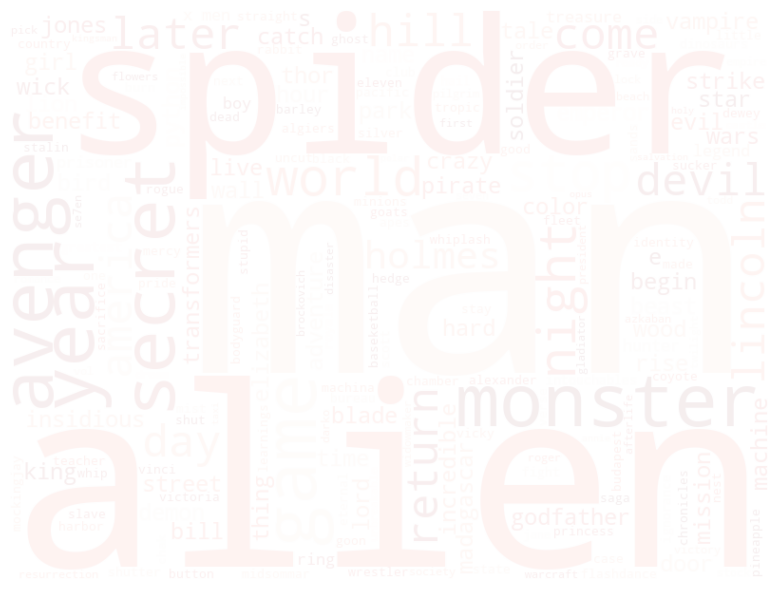

In [3]:
# create a large string with all the titles
titles_combined = ' '.join(df['name'])
titles_combined = list(set(titles_combined.split(' ')))
titles_combined = [word.lower() for word in titles_combined if len(word) > 3]
to_remove = ['man', 'world'] # remove some words that are not relevant
titles_combined = [word for word in titles_combined if word not in to_remove]
titles_combined = ' '.join(titles_combined)

# initiate a figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# create the wordcloud for the background
wordcloud = WordCloud(
    width=800, height=600,
    background_color ='white',
    colormap='Reds',
    contour_width=1,
    contour_color='black',
    random_state=2 # fix randomness
).generate(titles_combined)
ax.imshow(wordcloud, interpolation='bilinear', alpha=0.07)
ax.set_axis_off()

# display chart
plt.tight_layout()
plt.show()

## Line chart on top

For a dedicated post on how to **add a chart on top of another**, check [this post](/how-to-add-plot-inside-plot).


/var/folders/m2/jfzxyg4s0xz3jyw5f94r7tcm0000gn/T/ipykernel_20795/3519991070.py:44: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


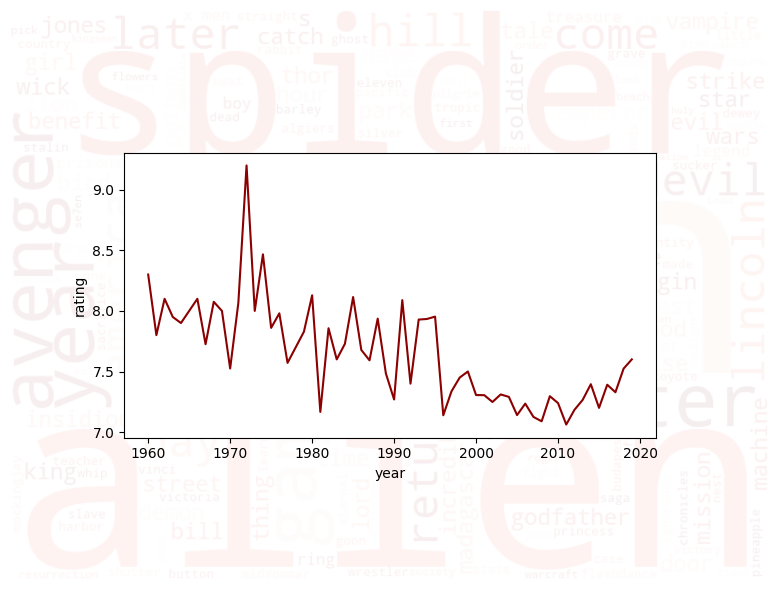

In [4]:
# create a large string with all the titles
titles_combined = ' '.join(df['name'])
titles_combined = list(set(titles_combined.split(' ')))
titles_combined = [word.lower() for word in titles_combined if len(word) > 3]
to_remove = ['man', 'world'] # remove some words that are not relevant
titles_combined = [word for word in titles_combined if word not in to_remove]
titles_combined = ' '.join(titles_combined)

# initiate a figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# create the wordcloud for the background
wordcloud = WordCloud(
    width=800, height=600,
    background_color ='white',
    colormap='Reds',
    contour_width=1,
    contour_color='black',
    random_state=2 # fix randomness
).generate(titles_combined)
ax.imshow(wordcloud, interpolation='bilinear', alpha=0.07)
ax.set_axis_off()

# create inside axe
sub_ax = inset_axes(
    parent_axes=ax,
    width="70%",
    height="50%",
    loc='center',
    borderpad=1 
)

# compute average rating per year
avg_rating = df.groupby('year')['rating'].mean().reset_index()
sns.lineplot(
    data=avg_rating,
    x='year', y='rating',
    color='darkred',
    ax=sub_ax,
    zorder=5
)

# display chart
plt.tight_layout()
plt.show()

## Add points on the line and remove axis

The main interest of the `wordcloud` in the background is only to be **fully visible**. For this, we have to remove the **background of the axis** on the top.

We also add **individual points** on the line to make it more readable. **Colors of the dots** with be proportional to the rating of the movie in order to **highlight the pattern**.


/var/folders/m2/jfzxyg4s0xz3jyw5f94r7tcm0000gn/T/ipykernel_20795/956014063.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


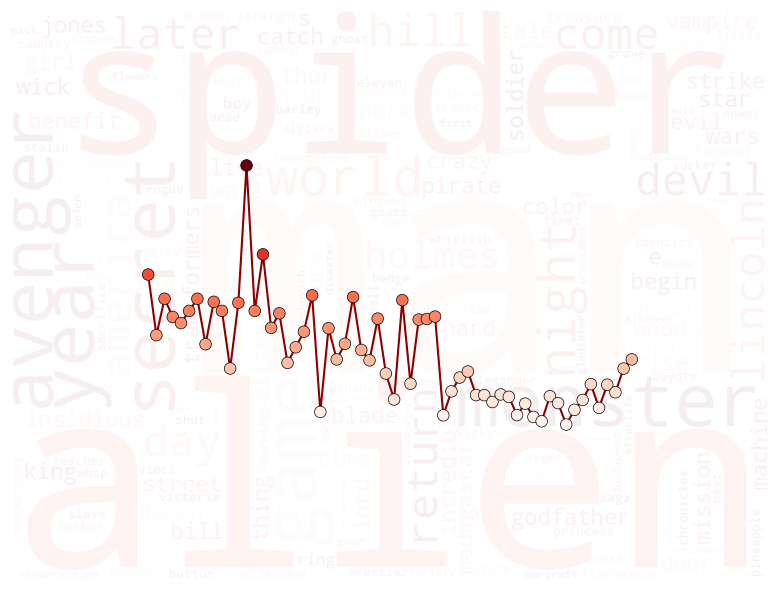

In [5]:
# create a large string with all the titles
titles_combined = ' '.join(df['name'])
titles_combined = list(set(titles_combined.split(' ')))
titles_combined = [word.lower() for word in titles_combined if len(word) > 3]
to_remove = ['man', 'world'] # remove some words that are not relevant
titles_combined = [word for word in titles_combined if word not in to_remove]
titles_combined = ' '.join(titles_combined)

# initiate a figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# create the wordcloud for the background
wordcloud = WordCloud(
    width=800, height=600,
    background_color ='white',
    colormap='Reds',
    contour_width=1,
    contour_color='black',
    random_state=2 # fix randomness
).generate(titles_combined)
ax.imshow(wordcloud, interpolation='bilinear', alpha=0.07)
ax.set_axis_off()

# create inside axe
sub_ax = inset_axes(
    parent_axes=ax,
    width="70%",
    height="50%",
    loc='center',
    borderpad=1 
)

# compute average rating per year
avg_rating = df.groupby('year')['rating'].mean().reset_index()
sns.lineplot(
    data=avg_rating,
    x='year', y='rating',
    color='darkred',
    ax=sub_ax,
    zorder=5
)

# add scatter plot on top
cmap = matplotlib.colormaps['Reds']
sub_ax.scatter(
    x=avg_rating['year'],
    y=avg_rating['rating'],
    cmap=cmap,
    c=avg_rating['rating'],
    s=70,
    edgecolor='black',
    linewidth=0.5,
    zorder=10,
)

# remove background from line chart
sub_ax.set_axis_off()

# display chart
plt.tight_layout()
plt.show()

## Scale and reference values

The chart is starting to look really nice, but it lacks scale and context. We can add a **reference lines** and **text** to give more information to the reader.


/var/folders/m2/jfzxyg4s0xz3jyw5f94r7tcm0000gn/T/ipykernel_20795/3469529372.py:88: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


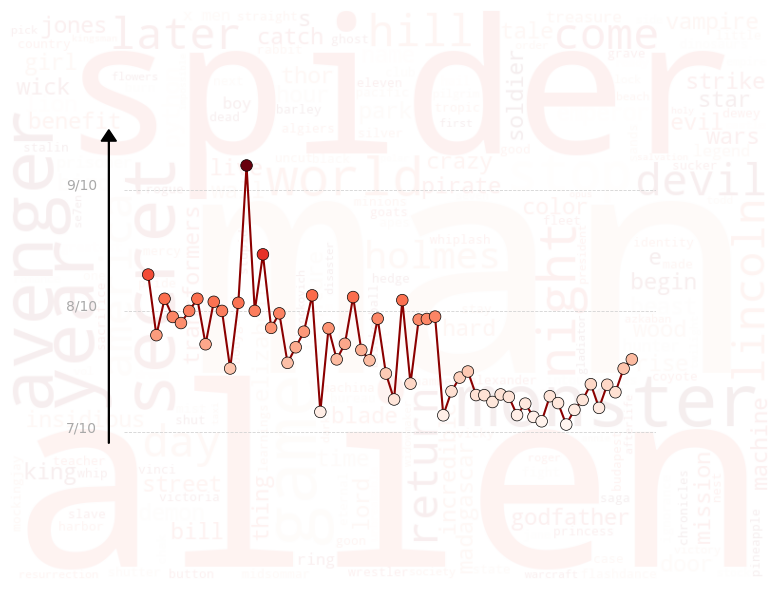

In [6]:
# create a large string with all the titles
titles_combined = ' '.join(df['name'])
titles_combined = list(set(titles_combined.split(' ')))
titles_combined = [word.lower() for word in titles_combined if len(word) > 3]
to_remove = ['man', 'world'] # remove some words that are not relevant
titles_combined = [word for word in titles_combined if word not in to_remove]
titles_combined = ' '.join(titles_combined)

# initiate a figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# create the wordcloud for the background
wordcloud = WordCloud(
    width=800, height=600,
    background_color ='white',
    colormap='Reds',
    contour_width=1,
    contour_color='black',
    random_state=2 # fix randomness
).generate(titles_combined)
ax.imshow(wordcloud, interpolation='bilinear', alpha=0.07)
ax.set_axis_off()

# create inside axe
sub_ax = inset_axes(
    parent_axes=ax,
    width="70%",
    height="50%",
    loc='center',
    borderpad=1 
)

# compute average rating per year
avg_rating = df.groupby('year')['rating'].mean().reset_index()
sns.lineplot(
    data=avg_rating,
    x='year', y='rating',
    color='darkred',
    ax=sub_ax,
    zorder=5
)

# add scatter plot on top
cmap = matplotlib.colormaps['Reds']
sub_ax.scatter(
    x=avg_rating['year'],
    y=avg_rating['rating'],
    cmap=cmap,
    c=avg_rating['rating'],
    s=70,
    edgecolor='black',
    linewidth=0.5,
    zorder=10,
)

# remove background from line chart
sub_ax.set_axis_off()

# display references
max_rate = 9
min_rate = 7
mid_rate = 8
sub_ax.axhline(y=max_rate, color='lightgrey', linestyle='--', lw=0.6)
sub_ax.axhline(y=min_rate, color='lightgrey', linestyle='--', lw=0.6)
sub_ax.axhline(y=mid_rate, color='lightgrey', linestyle='--', lw=0.6)
sub_ax.text(
    1950, max_rate, f"{max_rate:.0f}/10",
    fontsize=10, color='darkgrey'
)
sub_ax.text(
    1950, min_rate, f"{min_rate:.0f}/10",
    fontsize=10, color='darkgrey'
)
sub_ax.text(
    1950, mid_rate, f"{mid_rate:.0f}/10",
    fontsize=10, color='darkgrey'
)

# vertical line arrow for y axis of the subax
ax.arrow(
    0.13, 0.24, 0, 0.53,
    head_width=0.02, head_length=0.02,
    fc='black', ec='black',
    transform=ax.transAxes
)

# display chart
plt.tight_layout()
plt.show()

It's already looking better!


## Add title and credits

What would be a great without its title? Let's add it to the chart thanks to `highlight_text` package. For a dedicated explanation of how it works, check [this post](/advanced-custom-annotations-matplotlib).


/var/folders/m2/jfzxyg4s0xz3jyw5f94r7tcm0000gn/T/ipykernel_20795/138348101.py:127: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


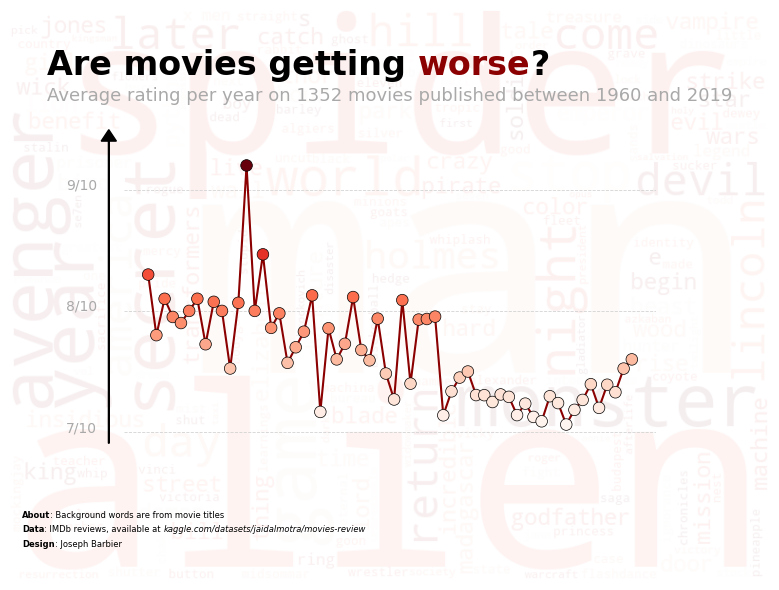

In [7]:
# create a large string with all the titles
titles_combined = ' '.join(df['name'])
titles_combined = list(set(titles_combined.split(' ')))
titles_combined = [word.lower() for word in titles_combined if len(word) > 3]
to_remove = ['man', 'world'] # remove some words that are not relevant
titles_combined = [word for word in titles_combined if word not in to_remove]
titles_combined = ' '.join(titles_combined)

# initiate a figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# create the wordcloud for the background
wordcloud = WordCloud(
    width=800, height=600,
    background_color ='white',
    colormap='Reds',
    contour_width=1,
    contour_color='black',
    random_state=2 # fix randomness
).generate(titles_combined)
ax.imshow(wordcloud, interpolation='bilinear', alpha=0.07)
ax.set_axis_off()

# create inside axe
sub_ax = inset_axes(
    parent_axes=ax,
    width="70%",
    height="50%",
    loc='center',
    borderpad=1 
)

# compute average rating per year
avg_rating = df.groupby('year')['rating'].mean().reset_index()
sns.lineplot(
    data=avg_rating,
    x='year', y='rating',
    color='darkred',
    ax=sub_ax,
    zorder=5
)

# add scatter plot on top
cmap = matplotlib.colormaps['Reds']
sub_ax.scatter(
    x=avg_rating['year'],
    y=avg_rating['rating'],
    cmap=cmap,
    c=avg_rating['rating'],
    s=70,
    edgecolor='black',
    linewidth=0.5,
    zorder=10,
)

# remove background from line chart
sub_ax.set_axis_off()

# display references
max_rate = 9
min_rate = 7
mid_rate = 8
sub_ax.axhline(y=max_rate, color='lightgrey', linestyle='--', lw=0.6)
sub_ax.axhline(y=min_rate, color='lightgrey', linestyle='--', lw=0.6)
sub_ax.axhline(y=mid_rate, color='lightgrey', linestyle='--', lw=0.6)
sub_ax.text(
    1950, max_rate, f"{max_rate:.0f}/10",
    fontsize=10, color='darkgrey'
)
sub_ax.text(
    1950, min_rate, f"{min_rate:.0f}/10",
    fontsize=10, color='darkgrey'
)
sub_ax.text(
    1950, mid_rate, f"{mid_rate:.0f}/10",
    fontsize=10, color='darkgrey'
)

# vertical line arrow for y axis of the subax
ax.arrow(
    0.13, 0.24, 0, 0.53,
    head_width=0.02, head_length=0.02,
    fc='black', ec='black',
    transform=ax.transAxes
)

# title
lower_bound = 1960
upper_bound = 2019
text = f"""
Are movies getting <worse>?
<Average rating per year on {df.shape[0]} movies published between {lower_bound} and {upper_bound}>
"""
fig_text(
    0.5, 0.92,
    text, color='black',
    fontweight='bold',
    fontsize=24,
    highlight_textprops=[
        {"color": 'darkred'},
        {"fontsize": 13,
         "color": 'darkgrey',
         "fontweight": 'normal'}
    ],
    ha='center'
)

# credit
text = """
<About>: Background words are from movie titles
<Data>: IMDb reviews, available at <kaggle.com/datasets/jaidalmotra/movies-review>
<Design>: Joseph Barbier
"""
fig_text(
    0.04, 0.15, 
    text, color='black',
    fontsize=6,
    highlight_textprops=[
        {"fontweight": 'bold'},
        {"fontweight": 'bold'},
        {"fontstyle": 'italic'},
        {"fontweight": 'bold'}
    ],
)

# display chart
plt.tight_layout()
plt.show()

## Final annotations + Image of the Godfather

And finally, we can add some **annotations** to the chart to give more information to the reader. We can also add an **image** of the Godfather to make the chart more appealing.

For a dedicated post on **how to add an image to a chart**, check [this post](/513-add-logo-matplotlib).

For a dedicated post on **how to add an arrow**, check [this post](/how-to-create-and-custom-arrows-matplotlib).


/var/folders/m2/jfzxyg4s0xz3jyw5f94r7tcm0000gn/T/ipykernel_20795/2028860925.py:179: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


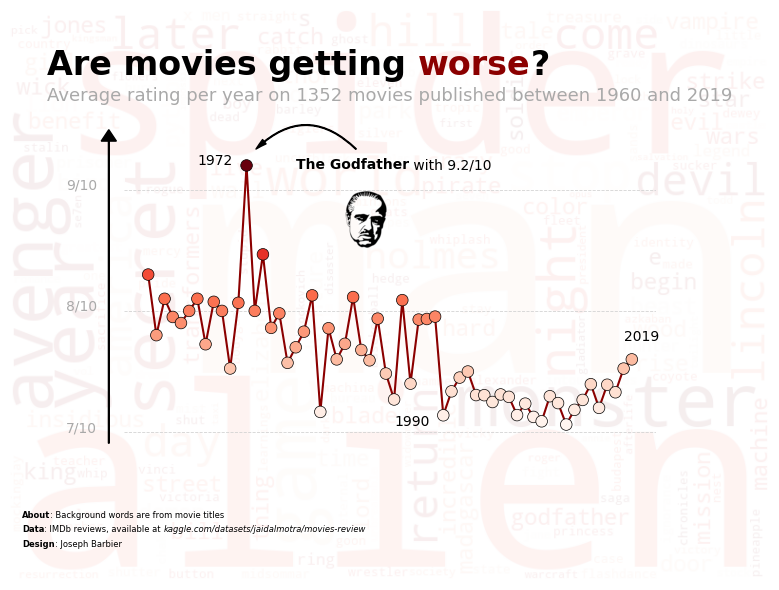

In [9]:
# create a large string with all the titles
titles_combined = ' '.join(df['name'])
titles_combined = list(set(titles_combined.split(' ')))
titles_combined = [word.lower() for word in titles_combined if len(word) > 3]
to_remove = ['man', 'world'] # remove some words that are not relevant
titles_combined = [word for word in titles_combined if word not in to_remove]
titles_combined = ' '.join(titles_combined)

# initiate a figure
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

# create the wordcloud for the background
wordcloud = WordCloud(
    width=800, height=600,
    background_color ='white',
    colormap='Reds',
    contour_width=1,
    contour_color='black',
    random_state=2 # fix randomness
).generate(titles_combined)
ax.imshow(wordcloud, interpolation='bilinear', alpha=0.07)
ax.set_axis_off()

# create inside axe
sub_ax = inset_axes(
    parent_axes=ax,
    width="70%",
    height="50%",
    loc='center',
    borderpad=1 
)

# compute average rating per year
avg_rating = df.groupby('year')['rating'].mean().reset_index()
sns.lineplot(
    data=avg_rating,
    x='year', y='rating',
    color='darkred',
    ax=sub_ax,
    zorder=5
)

# add scatter plot on top
cmap = matplotlib.colormaps['Reds']
sub_ax.scatter(
    x=avg_rating['year'],
    y=avg_rating['rating'],
    cmap=cmap,
    c=avg_rating['rating'],
    s=70,
    edgecolor='black',
    linewidth=0.5,
    zorder=10,
)

# remove background from line chart
sub_ax.set_axis_off()

# display references
max_rate = 9
min_rate = 7
mid_rate = 8
sub_ax.axhline(y=max_rate, color='lightgrey', linestyle='--', lw=0.6)
sub_ax.axhline(y=min_rate, color='lightgrey', linestyle='--', lw=0.6)
sub_ax.axhline(y=mid_rate, color='lightgrey', linestyle='--', lw=0.6)
sub_ax.text(
    1950, max_rate, f"{max_rate:.0f}/10",
    fontsize=10, color='darkgrey'
)
sub_ax.text(
    1950, min_rate, f"{min_rate:.0f}/10",
    fontsize=10, color='darkgrey'
)
sub_ax.text(
    1950, mid_rate, f"{mid_rate:.0f}/10",
    fontsize=10, color='darkgrey'
)

# vertical line arrow for y axis of the subax
ax.arrow(
    0.13, 0.24, 0, 0.53,
    head_width=0.02, head_length=0.02,
    fc='black', ec='black',
    transform=ax.transAxes
)

# title
lower_bound = 1960
upper_bound = 2019
text = f"""
Are movies getting <worse>?
<Average rating per year on {df.shape[0]} movies published between {lower_bound} and {upper_bound}>
"""
fig_text(
    0.5, 0.92,
    text, color='black',
    fontweight='bold',
    fontsize=24,
    highlight_textprops=[
        {"color": 'darkred'},
        {"fontsize": 13,
         "color": 'darkgrey',
         "fontweight": 'normal'}
    ],
    ha='center'
)

# credit
text = """
<About>: Background words are from movie titles
<Data>: IMDb reviews, available at <kaggle.com/datasets/jaidalmotra/movies-review>
<Design>: Joseph Barbier
"""
fig_text(
    0.04, 0.15, 
    text, color='black',
    fontsize=6,
    highlight_textprops=[
        {"fontweight": 'bold'},
        {"fontweight": 'bold'},
        {"fontstyle": 'italic'},
        {"fontweight": 'bold'}
    ],
)

# image of godfather
path = 'https://raw.githubusercontent.com/holtzy/The-Python-Graph-Gallery/master/static/data/godfather-for-chart.png'
path = '../../static/data/godfather-for-chart.png'
image = np.array(Image.open(path))
image = image / 255
ax_image = fig.add_axes([0.42, 0.55, 0.1, 0.15])
ax_image.imshow(image) # display
ax_image.set_axis_off() # remove axis

# text about the godfather
godf_rate = df[df['name'].str.contains('The Godfather')]['rating'].values[0]
ax_text(
    1990, 9.2,
    f"<The Godfather> with {godf_rate:.1f}/10",
    color='black',
    fontsize=10,
    ha='center',
    va='center',
    highlight_textprops=[
        {"fontweight": 'bold'}
    ],
    ax=sub_ax
)

# arrow 
def draw_arrow(tail_position, head_position, invert=False):
    kw = dict(arrowstyle="Simple, tail_width=0.5, head_width=4, head_length=8", color="k")
    if invert:
        connectionstyle = "arc3,rad=-.5"
    else:
        connectionstyle = "arc3,rad=.5"
    a = FancyArrowPatch(tail_position, head_position,
                                connectionstyle=connectionstyle,
                                transform=fig.transFigure,
                                **kw)
    fig.patches.append(a)
draw_arrow((0.46, 0.74), (0.33, 0.74))

# highlight specific years
sub_ax.text(
    1966, 9.2, '1972',
    fontsize=10, color='black'
)
sub_ax.text(
    1990, 7.05, '1990',
    fontsize=10, color='black'
)
sub_ax.text(
    2018, 7.75, '2019',
    fontsize=10, color='black'
)

# display chart
plt.tight_layout()
fig.savefig('../../static/graph/web-worcloud-with-line-chart.png')
plt.show()

## Going further

This article explains how to reproduce **a combination** of a [wordcloud](/wordcloud) and a [line-chart](/line-chart) using [matplotlib](/matplotlib).

You might be interested in this [beautiful line chart](/web-line-chart-small-multiple) and how to [change the shape of a wordcloud](/262-wordcloud-with-specific-shape).
